In [4]:
import re
import time
import math
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [5]:
mta = pd.read_csv('C:/Users/keith/Desktop/MTA.csv',encoding = "ISO-8859-1" )

In [132]:
# get dummies for Type categorical var 
a = pd.concat([a, pd.get_dummies(mta.ArrivalProximityText.astype('category'),drop_first=True),], axis=1)
#housing.head()
mta = mta.drop(pd.get_dummies(mta.ArrivalProximityText,drop_first=True), axis=1)
#housing.head()


In [133]:
mta.head(500)

,Unnamed: 0,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,2017-06-01 00:06:14
1,1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,2017-06-01 23:58:02
2,2,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,2017-06-01 00:00:53
3,3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,2017-06-01 00:03:00
4,4,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11.0,2017-06-01 00:03:56,2017-06-01 23:59:38
5,5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,2017-06-01 00:02:35
6,7,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,40.648801,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,2017-06-01 23:58:47
7,8,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,2017-06-01 00:00:00
8,9,2017-06-01 00:03:51,1,S59,RICHMOND TER/PARK AV #3,40.640167,-74.130966,HYLAN BL,40.534260,-74.154213,NYCT_8279,40.590689,-74.165811,RICHMOND AV/NOME AV,approaching,31.0,2017-06-01 00:03:56,2017-06-01 00:01:14
9,10,2017-06-01 00:03:48,0,Bx28,VALENTINE AV/E 192 ST,40.864079,-73.894615,CO-OP CITY EARHART LA via GUNHILL,40.860828,-73.822670,NYCT_8334,40.876032,-73.829543,DREISER LOOP/DEBS PL,< 1 stop away,207.0,2017-06-01 00:04:29,2017-06-01 23:48:35


In [126]:
mta.ArrivalProximityText.value_counts()

approaching        2229794
< 1 stop away      1966314
at stop            1403825
0.6 miles away       36954
0.5 miles away       25618
0.7 miles away       22198
0.8 miles away       12790
0.9 miles away       10557
1.0 miles away        8784
1.1 miles away        5662
1.2 miles away        4727
1.5 miles away        3950
1.3 miles away        3194
1.4 miles away        3132
2.8 miles away        3117
2.7 miles away        2942
1.6 miles away        2926
2.6 miles away        2767
2.5 miles away        2711
2.3 miles away        2685
2.2 miles away        2650
1.9 miles away        2597
2.1 miles away        2536
2.0 miles away        2531
1.7 miles away        2511
2.4 miles away        2463
1.8 miles away        2420
2.9 miles away        2181
3.0 miles away        1458
3.1 miles away        1134
3.2 miles away        1079
3.5 miles away         993
3.4 miles away         983
3.3 miles away         958
3.6 miles away         865
3.7 miles away         858
5.8 miles away         814
3

In [125]:
a.head(100)

,Unnamed: 0,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,late,E,S,V,Late_arrivals
3254,3720,2017-06-01 01:03:44,1,B68,PROSPECT PK SW/BARTEL PRITCHARD SQ,40.660698,-73.979408,CONEY ISLAND STILLWELL AV via C I AV,40.576992,-73.981430,NYCT_453,40.580031,-73.974388,NEPTUNE AV/W 6 ST,at stop,12.0,2017-06-01 01:03:49,2017-06-01 01:04:35,-1 days +23:59:14,01:03:49,17318 days 01:04:35,-1,0
3255,3721,2017-06-01 01:03:44,1,B68,PROSPECT PK SW/BARTEL PRITCHARD SQ,40.660698,-73.979408,CONEY ISLAND STILLWELL AV via C I AV,40.576992,-73.981430,NYCT_453,40.580031,-73.974388,NEPTUNE AV/W 6 ST,at stop,12.0,2017-06-01 01:03:49,2017-06-01 01:03:35,00:00:14,01:03:49,17318 days 01:03:35,0,1
3256,3722,2017-06-01 01:03:34,0,Bx1,LINCOLN AV/E 137 ST,40.809616,-73.928276,RIVERDALE 231 ST via CONCOURSE,40.881062,-73.908691,NYCT_4710,40.824187,-73.924119,GRAND CONCOURSE/E 161 ST,< 1 stop away,277.0,2017-06-01 01:04:51,2017-06-01 01:04:16,00:00:35,01:04:51,17318 days 01:04:16,0,1
3257,3723,2017-06-01 01:03:20,1,B31,QUENTIN RD/E 16 ST,40.608429,-73.957130,GERITSON BCH,40.587139,-73.918938,NYCT_4611,40.606085,-73.955120,AV R/E 18 ST,at stop,9.0,2017-06-01 01:03:49,2017-06-01 01:06:32,-1 days +23:57:17,01:03:49,17318 days 01:06:32,-1,0
3258,3724,2017-06-01 01:03:21,0,S74,BRICKTOWN SHOPPING/CENTER,40.530102,-74.226295,ST GEORGE FERRY,40.643585,-74.072609,NYCT_8173,40.573020,-74.136089,RICHMOND RD/WILDER AV,< 1 stop away,154.0,2017-06-01 01:03:49,2017-06-01 01:04:11,-1 days +23:59:38,01:03:49,17318 days 01:04:11,-1,0
3259,3725,2017-06-01 01:03:46,1,B83,VAN SINDEREN AV/FULTON ST,40.678089,-73.903572,SPRING CREEK GATEWAY MALL,40.652821,-73.876755,NYCT_4841,40.643168,-73.875916,SHORE PY EN EB/PENNSYLVANIA AV,approaching,33.0,2017-06-01 01:03:52,2017-06-01 01:00:31,00:03:21,01:03:52,17318 days 01:00:31,0,1
3260,3726,2017-06-01 01:03:15,1,B82,SEAVIEW AV/PENNSYLVANIA AV,40.642979,-73.878334,CNY ISLND STILLWELL AV via FLATLANDS AV,40.576973,-73.981400,NYCT_6592,40.621289,-73.935267,KINGS HY/E 38 ST,< 1 stop away,324.0,2017-06-01 01:04:52,2017-06-01 01:04:00,00:00:52,01:04:52,17318 days 01:04:00,0,1
3262,3728,2017-06-01 01:03:28,0,Bx28,BAINBRIDGE AV/E 206 ST,40.874889,-73.879364,CO-OP CITY EARHART LA via GUNHILL,40.860828,-73.822670,NYCT_8334,40.878909,-73.873695,E GUN HILL RD/HULL AV,approaching,52.0,2017-06-01 01:03:49,2017-06-01 01:00:12,00:03:37,01:03:49,17318 days 01:00:12,0,1
3263,3729,2017-06-01 01:03:36,1,Bx31,VAN CORTLANDT PK E/E 242 ST,40.902660,-73.868378,WESTCHESTER SQ,40.841076,-73.842850,NYCT_274,40.886047,-73.844748,E 229 ST/SCHIEFFELIN AV,< 1 stop away,217.0,2017-06-01 01:04:31,2017-06-01 01:03:00,00:01:31,01:04:31,17318 days 01:03:00,0,1
3264,3730,2017-06-01 01:03:23,1,Bx36,RANDALL AV/OLMSTEAD AV,40.818676,-73.851555,WASHINGTON HTS GW BRIDGE,40.849033,-73.937309,NYCT_7766,40.848668,-73.901060,E TREMONT AV/ANTHONY AV,< 1 stop away,284.0,2017-06-01 01:04:28,2017-06-01 01:02:00,00:02:28,01:04:28,17318 days 01:02:00,0,1


In [91]:
a.DirectionRef.dtype

dtype('int64')

In [8]:
mta['ExpectedArrivalTime'] = pd.to_datetime(mta.ExpectedArrivalTime)

In [80]:
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
a.head(1)

,Unnamed: 0,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,late,E,S,V,Late_arrivals
3254,3720,2017-06-01 01:03:44,1,B68,PROSPECT PK SW/BARTEL PRITCHARD SQ,40.660698,-73.979408,CONEY ISLAND STILLWELL AV via C I AV,40.576992,-73.98143,NYCT_453,40.580031,-73.974388,NEPTUNE AV/W 6 ST,at stop,12.0,2017-06-01 01:03:49,2017-06-01 01:04:35,-1 days +23:59:14,01:03:49,17318 days 01:04:35,-1,0


In [135]:
mta.columns

Index(['Unnamed: 0', 'RecordedAtTime', 'DirectionRef', 'PublishedLineName',
       'OriginName', 'OriginLat', 'OriginLong', 'DestinationName',
       'DestinationLat', 'DestinationLong', 'VehicleRef',
       'VehicleLocation.Latitude', 'VehicleLocation.Longitude',
       'NextStopPointName', 'ArrivalProximityText', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime'],
      dtype='object')

In [141]:
features =  [  
         'DistanceFromStop']

Y = a['Late_arrivals'] 
X = a.drop(['Unnamed: 0', 'RecordedAtTime', 'DirectionRef', 'PublishedLineName',
       'OriginName', 'OriginLat', 'OriginLong', 'DestinationName',
       'DestinationLat', 'DestinationLong', 'VehicleRef',
       'VehicleLocation.Latitude', 'VehicleLocation.Longitude',
       'NextStopPointName', 'ArrivalProximityText', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime'],1)

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

 # Automatic feature selection with SelectKbest
import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest(k=all)
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
x_train_selected = X_train[colnames_selected]
x_test_selected = X_test[colnames_selected]

X = a[colnames_selected]
Y = a['Late_arrivals']

# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train_selected) 
X_train = scaler.transform(x_train_selected)
X_test = scaler.transform(x_test_selected)


MemoryError: 

In [142]:
X_train.shape

(4643494, 213)

In [143]:
Y = a['Late_arrivals'].astype(float)
X = a[features].astype(float)


# Instantiate and fit our model.
lr = linear_model.LogisticRegression(solver='lbfgs', class_weight='balanced')

lr.fit(X_train,y_train)

 
from sklearn.model_selection import cross_val_score
print('Accuracy score :',lr.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(lr, X_test , y_test, cv=5,scoring='roc_auc'))
 
 
 
# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-squared:')
print(lr.score(X_test, y_test))

MemoryError: 

In [119]:
# Confusion matrix
y_pred = lr.predict(X_test) 
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()


# Classification report
from sklearn.metrics import classification_report

print("Classification Report") 
print(classification_report(y_test ,y_pred))
# plot ROC
AUC_ROC_plot(lr, X_test,y_test)

Consfusion Matrix
Late_arrivals       0       1
row_0                        
0              271242  839438
1                5224   23763

Classification Report
              precision    recall  f1-score   support

           0       0.24      0.98      0.39    276466
           1       0.82      0.03      0.05    863201

   micro avg       0.26      0.26      0.26   1139667
   macro avg       0.53      0.50      0.22   1139667
weighted avg       0.68      0.26      0.14   1139667



NameError: name 'AUC_ROC_plot' is not defined

In [114]:
from sklearn.tree import DecisionTreeClassifier
# Fit regression tree model
tree = DecisionTreeClassifier(max_depth=2,random_state=20,class_weight='balanced') 
tree.fit(X_train, y_train)


print('Accuracy score :',tree.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(tree, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.3893286372247332
ROC_AUC cross validataion score:  [0.54433176 0.54379579 0.54516733 0.54462278 0.54565132]


In [115]:
y_pred = tree.predict(X_test)

# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()

# Classification report
print("Classification Report")
from sklearn.metrics import classification_report

 
print(classification_report(y_test ,y_pred,  ))
# plot ROC
AUC_ROC_plot(tree, X_test,y_test)

Consfusion Matrix
Late_arrivals       0       1
row_0                        
0              221489  640985
1               54977  222216

Classification Report
              precision    recall  f1-score   support

           0       0.26      0.80      0.39    276466
           1       0.80      0.26      0.39    863201

   micro avg       0.39      0.39      0.39   1139667
   macro avg       0.53      0.53      0.39   1139667
weighted avg       0.67      0.39      0.39   1139667



NameError: name 'AUC_ROC_plot' is not defined

In [89]:
a.Late_arrivals.dtype

dtype('int32')

In [11]:
mta['ExpectedArrivalTime'] = pd.to_datetime(mta.ExpectedArrivalTime)

In [13]:
a = mta[mta.ScheduledArrivalTime.dt.hour!=0]

In [14]:
a = a[a.ExpectedArrivalTime.dt.hour!=0]

In [20]:
a['V'] = a.late.dt.days

In [19]:
a['late'] = a.ExpectedArrivalTime - a.ScheduledArrivalTime

In [21]:
a['Late_arrivals'] = np.where(a['V']==0, 1, 0)

In [45]:

a['S'] = pd.to_timedelta(a.ScheduledArrivalTime ) 

In [46]:
a['late'] = a.E - a.S

In [49]:
a['TS'] = pd.Timestamp(a.ScheduledArrivalTime.dt.time)

TypeError: Cannot convert input [3254       01:04:35
3255       01:03:35
3256       01:04:16
3257       01:06:32
3258       01:04:11
3259       01:00:31
3260       01:04:00
3262       01:00:12
3263       01:03:00
3264       01:02:00
3265       01:04:00
3266       01:08:00
3267       01:04:46
3268       01:01:42
3269       01:06:08
3270       01:02:04
3271       01:05:39
3272       01:01:38
3273       01:04:37
3274       01:06:38
3275       01:03:58
3277       01:02:17
3280       01:04:34
3283       01:02:42
3284       01:15:54
3285       01:02:27
3286       01:04:31
3287       01:04:12
3288       01:02:22
3289       01:04:15
             ...   
5804337    23:52:58
5804338    23:47:00
5804339    23:49:08
5804340    23:50:03
5804341    23:48:49
5804342    23:57:05
5804343    23:38:31
5804344    23:42:56
5804345    23:52:43
5804346    23:56:44
5804347    23:24:35
5804348    23:17:34
5804349    23:10:00
5804350    23:53:41
5804351    23:46:11
5804352    22:56:32
5804353    23:44:12
5804354    23:51:20
5804355    23:19:00
5804356    23:45:00
5804357    23:53:43
5804358    23:47:40
5804359    23:30:16
5804360    23:46:22
5804361    23:30:18
5804362    23:47:00
5804364    23:44:12
5804365    23:44:16
5804366    23:50:00
5804367    23:45:15
Name: ScheduledArrivalTime, Length: 5698333, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

In [124]:
a['B'] = mta.ExpectedArrivalTime.dt.time

AttributeError: Can only use .dt accessor with datetimelike values

In [22]:
a.head()

,Unnamed: 0,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,...,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,late,V,Late_arrivals
3254,3720,2017-06-01 01:03:44,1,B68,PROSPECT PK SW/BARTEL PRITCHARD SQ,40.660698,-73.979408,CONEY ISLAND STILLWELL AV via C I AV,40.576992,-73.981430,...,40.580031,-73.974388,NEPTUNE AV/W 6 ST,at stop,12.0,2017-06-01 01:03:49,2017-06-01 01:04:35,-1 days +23:59:14,-1,0
3255,3721,2017-06-01 01:03:44,1,B68,PROSPECT PK SW/BARTEL PRITCHARD SQ,40.660698,-73.979408,CONEY ISLAND STILLWELL AV via C I AV,40.576992,-73.981430,...,40.580031,-73.974388,NEPTUNE AV/W 6 ST,at stop,12.0,2017-06-01 01:03:49,2017-06-01 01:03:35,00:00:14,0,1
3256,3722,2017-06-01 01:03:34,0,Bx1,LINCOLN AV/E 137 ST,40.809616,-73.928276,RIVERDALE 231 ST via CONCOURSE,40.881062,-73.908691,...,40.824187,-73.924119,GRAND CONCOURSE/E 161 ST,< 1 stop away,277.0,2017-06-01 01:04:51,2017-06-01 01:04:16,00:00:35,0,1
3257,3723,2017-06-01 01:03:20,1,B31,QUENTIN RD/E 16 ST,40.608429,-73.957130,GERITSON BCH,40.587139,-73.918938,...,40.606085,-73.955120,AV R/E 18 ST,at stop,9.0,2017-06-01 01:03:49,2017-06-01 01:06:32,-1 days +23:57:17,-1,0
3258,3724,2017-06-01 01:03:21,0,S74,BRICKTOWN SHOPPING/CENTER,40.530102,-74.226295,ST GEORGE FERRY,40.643585,-74.072609,...,40.573020,-74.136089,RICHMOND RD/WILDER AV,< 1 stop away,154.0,2017-06-01 01:03:49,2017-06-01 01:04:11,-1 days +23:59:38,-1,0


In [ ]:
mta.ArrivalProximityText.str.replace('0.6 miles away','.06')

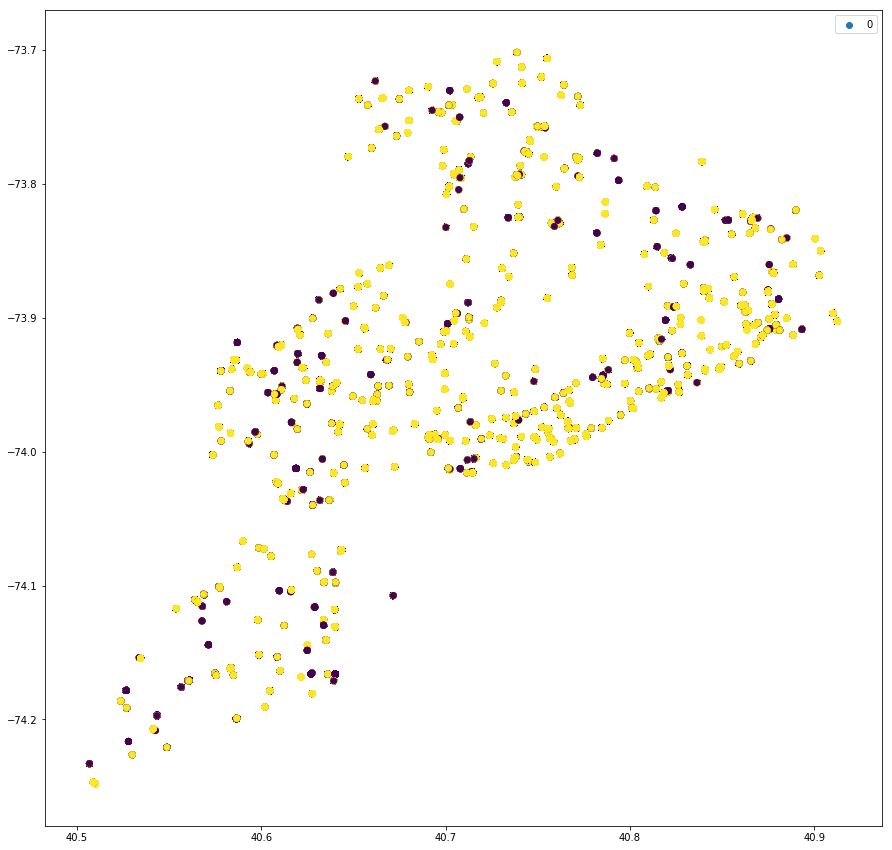

In [30]:
plt.figure(figsize=(15,15))
plt.scatter(a.OriginLat,a.OriginLong, c=a.Late_arrivals)
plt.legend(a.Late_arrivals)

In [37]:
len(mta[mta.ScheduledArrivalTime.dt.day==2].ScheduledArrivalTime)

222498